# <center>Laboratorium 12<br>Metody Numeryczne</center>    


Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań różniczkowych
zwyczajnych. Będziemy rozpatrywać równania różniczkowe postaci
$$\dot{x}(t) = f(x(t), t)$$
gdzie:

$x(t) \in \mathbb{R}^n$,

$t \ge 0$ 


z warunkiem początkowym $x(0) = x0$

Jest to tak zwany problem początkowy (problem Cauchy’ego) dla równań różniczkowych zwyczajnych.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import main
from scipy.integrate import solve_ivp
from typing import Union, Callable


**Zadanie 1.**  
Zaimplementuj metodę *solve_euler* z main.py 

In [3]:
def solve_euler(fun: Callable, t_span: np.array, y0: np.array):

    if not(isinstance(fun, Callable) and isinstance(t_span, np.ndarray) and isinstance(y0, np.ndarray)):
        return None
    y = y0
    
    for i in range(0, y.shape[0] - 1):
        y[i + 1, :] = y[i, :] + fun(y[i, :], t_span[i]) * (t_span[i + 1] - t_span[i])
    return y


***Zadanie 2.*** 

Dla 3 różnych kroków czasowych (1e1, 1e-2, 1e-5) korzystając z metody z zadania 1 rozwiąż równanie 

$
\dot{x}(t)= \frac{x+t}{x-t}
$ 

$x(0)=1$ (równanie to posiada rozwiązanie dokładne: 
$x(t)=t+\sqrt{1+2t^2}$).

Narysuj wykres podanego rozwiązania dokładnego oraz uzyskanych rozwiązań numerycznych.


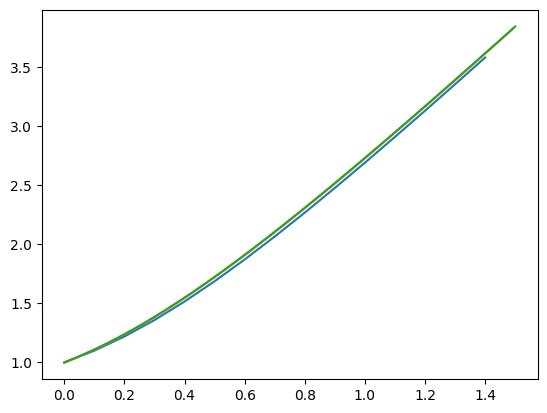

In [4]:
def fun(x, t):
    return (x+t)/(x-t)

def derived_fun(t):
    return t + np.sqrt(1 + 2 * t ** 2)

steps = [1e-1, 1e-2, 1e-5]
for h in steps:
    time = np.arange(0, 1.5, h)
    x = np.zeros((len(time), 1))
    x[0] = 1
    result = main.solve_euler(fun, time, x)
    plt.plot(time, result)
    


    

***Zadanie 3.*** 

Dla 3 różnych kroków czasowych (1e1, 1e-2, 1e-5):

1. Rozwiąż układ równań różniczkowych: 
$$
\begin{array}{l}
\dot{x_1}(t)={x_3}(t)\\
\dot{x_2}(t)={x_4}(t)\\
\dot{x_3}(t)=-\frac{x_1(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}\\
\dot{x_4}(t)=-\frac{x_2(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}
\end{array}
$$
      
z warunkiem początkowym $x(0)=[1,0,0,1]^T$.
    
Dla takiego warunku początkowego układ ten ma rozwiązanie szczególne 
$$
x(t)=\left[\begin{matrix}
cos(t)\\
sin(t)\\
-sin(t)\\
cos(t)
\end{matrix}\right].
$$  

2. Narysuj wykres podanego rozwiązania szczegółowego oraz uzyskanych rozwiązań numerycznych.
3. Sprawdź po jakim czasie t rozwiązania numeryczne przestaną dawać zadowalające wyniki. W tym celu zbadaj błąd między rozwiązania numerycznego względem szczagólnego

C:\Users\Piotrek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\Piotrek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


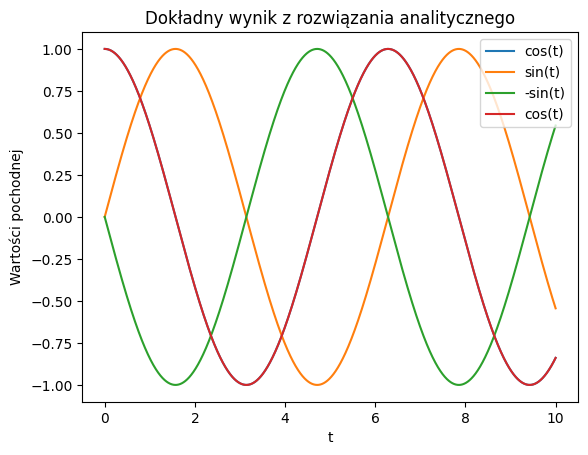

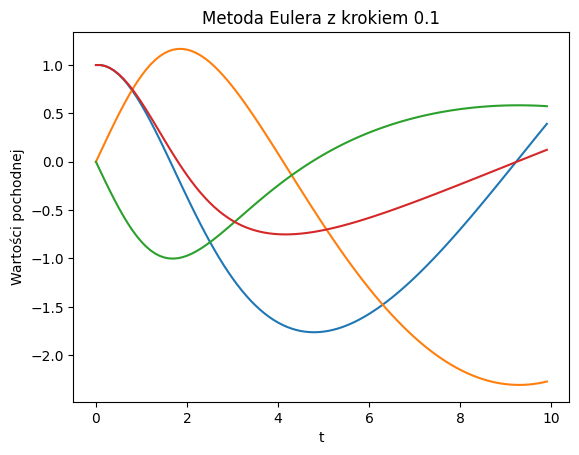

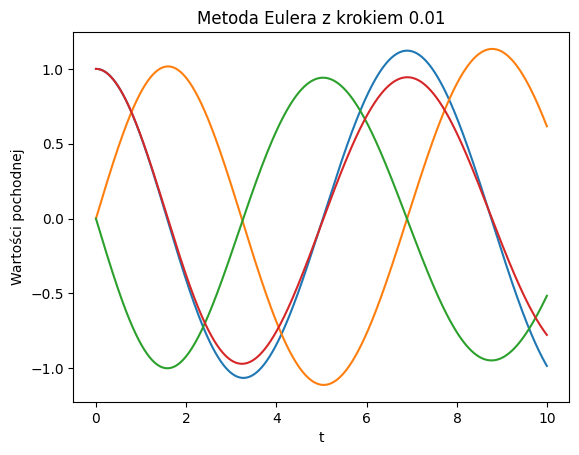

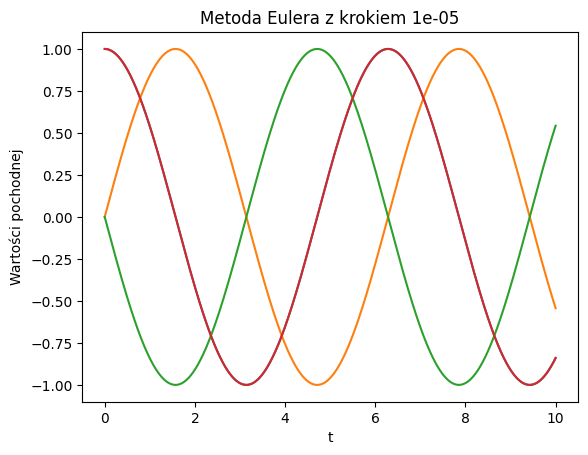

In [5]:
def deriv_x(x: np.array,t):
    dx1 = x[2]
    dx2 = x[3]
    dx3 = -x[0]/((x[0] ** 2 + x[1] ** 2) ** (3/2))
    dx4 = -x[1]/((x[0] ** 2 + x[1] ** 2) ** (3/2))
    return np.array([dx1,dx2,dx3,dx4])
# Wyrysuję najpierw dokładny wynik
t = np.arange(0, 10, 1e-5)
plt.plot(t, np.cos(t), label='cos(t)')
plt.plot(t, np.sin(t), label='sin(t)')
plt.plot(t, -np.sin(t), label='-sin(t)')
plt.plot(t, np.cos(t), label='cos(t)')
plt.title("Dokładny wynik z rozwiązania analitycznego")
plt.legend()
plt.xlabel('t'), plt.ylabel('Wartości pochodnej')

#rozwiązania metodą Eulera
steps = [1e-1, 1e-2, 1e-5]
for h in steps:
    plt.figure()
    time = np.arange(0, 10, h)
    x = np.zeros((len(time), 4))
    x[0] = [1, 0, 0, 1]
    result = main.solve_euler(deriv_x, time, x)
    plt.plot(time, result)
    plt.title(f'Metoda Eulera z krokiem {h}')
    plt.xlabel('t'), plt.ylabel('Wartości pochodnej')
    

***Zadanie 4.*** 

Za pomocą funkcji solve_ivp przy wykorzystaniu dwóch metod RK45 i RK23 rozwiąż układ równań z poprzedniego zadania i porównaj wyniki dla takiego samego przedziału czasu.

Sprawdź ile razy każda z metod obliczała równanie prawej strony (parametr nfev). Odnieś to do analogicznej liczby z metody z poprzedniego zadania

Dla wybranej metody zbadaj wpływ parametru rtol na rozwiązanie

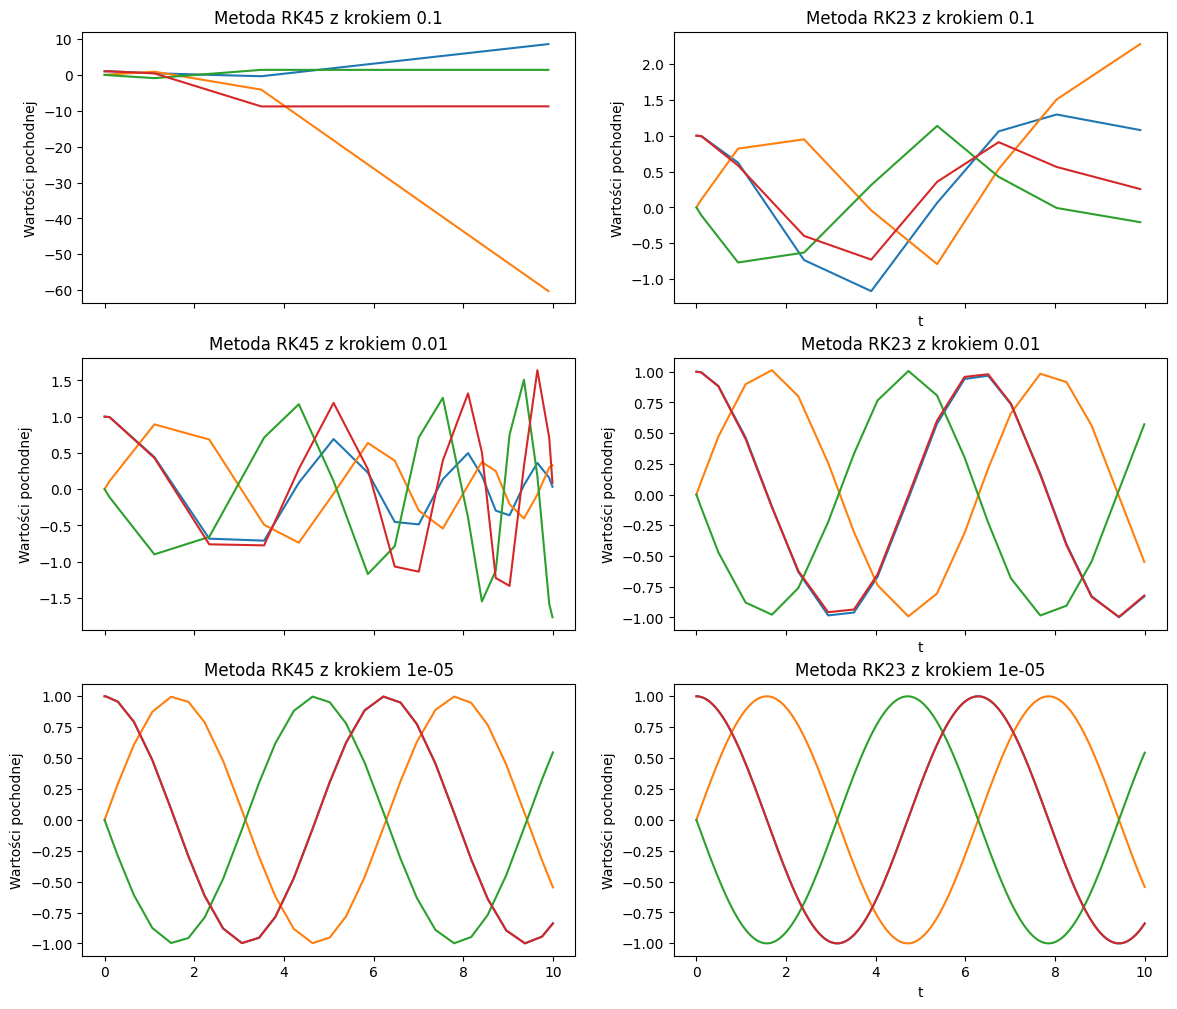

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [6]:
def deriv_x(t, x):
    dx1 = x[2]
    dx2 = x[3]
    dx3 = -x[0]/((x[0] ** 2 + x[1] ** 2) ** (3/2))
    dx4 = -x[1]/((x[0] ** 2 + x[1] ** 2) ** (3/2))
    return np.array([dx1,dx2,dx3,dx4])

fig, axs = plt.subplots(3, 2, figsize=(14, 12), sharex=True)

steps = [1e-1, 1e-2, 1e-5]
i = 0
for h in steps:
    plt.figure()
    time = np.arange(0, 10, h)
    x = np.zeros((len(time), 4))
    x[0] = np.array([1, 0, 0, 1])
    result = solve_ivp(deriv_x, [time[0], time[-1]], x[0], method='RK45', rtol=h)
    axs[i, 0].plot(result.t, result.y.T, label=f'Step size: {h}')
    axs[i, 0].set_title(f'Metoda RK45 z krokiem {h}')
    axs[i, 0].set_ylabel('Wartości pochodnej')
    axs[i, 1].set_xlabel('t')

    i+=1
    
i = 0
for h in steps:
    time = np.arange(0, 10, h)
    x = np.zeros((len(time), 4))
    x[0] = np.array([1, 0, 0, 1])
    result = solve_ivp(deriv_x, [time[0], time[-1]], x[0], method='RK23', rtol=h)
    axs[i, 1].plot(result.t, result.y.T, label=f'Step size: {h}')
    axs[i, 1].set_title(f'Metoda RK23 z krokiem {h}')
    axs[i, 1].set_ylabel('Wartości pochodnej')
    axs[i, 1].set_xlabel('t')

    i+=1

plt.tight_layout()


***Zadanie 5.*** 

Orbita Arenstorfa. Jest to przykład z astronomii opisujący zredukowany problem trzech ciał. Rozważa się dwa ciała o masach $\mu$ i $\mu'=1-\mu$, poruszające się w ruchu kołowym na jednej płaszczyźnie oraz ciało o pomijalnej masie poruszające się między nimi w tej samej płaszczyźnie. Dany jest układ równań różniczkowych:
$$
\begin{array}{l}
\dot{x_1}(t)={x_2}(t)\\
\dot{x_2}(t)={x_1}(t)+2x_4(t)-\mu'\frac{x_1+\mu}{D_1}-\mu\frac{x_1-\mu'}{D_2}\\
\dot{x_3}(t)=x_4(t)\\
\dot{x_4}(t)=x_3(t)-2x_2(t)-\mu'\frac{x_3(t)}{D_1}
-\mu\frac{x_3(t)}{D_2}\end{array}.
$$

gdzie
$$
\begin{array}{l}
D_1=((x_1(t)+\mu)^2+{x_3}^2(t))^\frac{3}{2}\\
D_2=((x_1(t)-\mu')^2+{x_3}^2(t))^\frac{3}{2}\\
\mu=0.012277471\end{array}.
$$

Zmienne $x_1$ i $x_3$ odpowiadają za współrzędne na płaszczyźnie trzeciego ciała zaś $x_2$ i $x_4$
są odpowiednio prędkościami. Warto zwrócić uwagę, że zarówno czas jak i masa zostały
w równaniach przeskalowane, i nie mają bezpośredniej interpretacji fizycznej, należy je
traktować jako zmienne bezwymiarowe. Dla pewnych warunków początkowych i czasu
symulacji
$$
\begin{array}{l}
x_1(0) = 0.994\\
x_2(0) = 0\\
x_3(0) = 0\\
x_4(0) = − 2.00158510637908252240537862224\\
T = 17.0652165601579625588917206249.\end{array}
$$
dokładne rozwiązanie tych równań jest okresowe ($x(0)=x(T)$).

Funkcję obliczającą pochodne zaimplementuj w main.py

Narysuj wykres uzyskanych rozwiązań numerycznych.

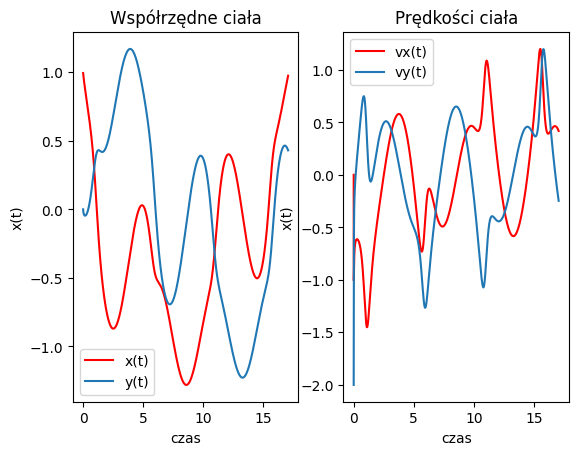

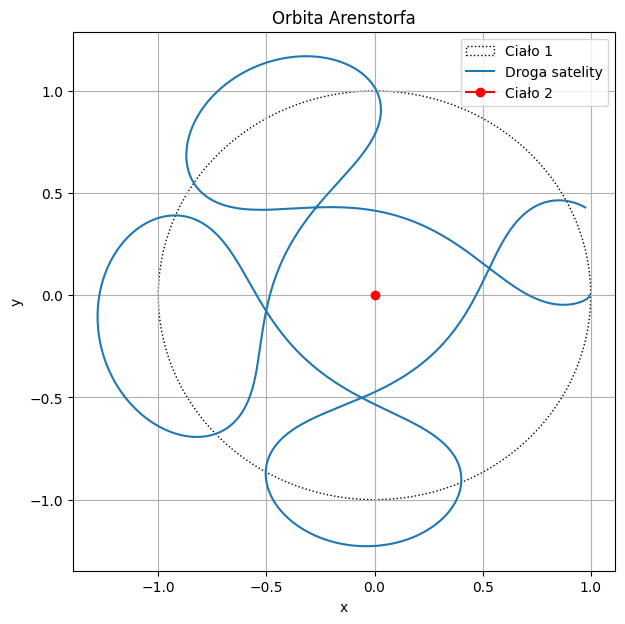

In [39]:
def arenstorf(x, t):
    try:
        if not(isinstance(t, int) or isinstance(t, float)):
            return None
        # dane pomocnicze
        u = 0.012277471
        u_p = 1 - u
        D1 = np.power(np.power(x[0] + u ,2) + np.power(x[2],2),3/2)
        D2 = np.power(np.power(x[0] - u_p,2) + np.power(x[2],2),3/2)
        # układ równań różniczkowych
        dx1 = x[1]
        dx2 = x[0] + 2 * x[3] - u_p * (x[0] + u) / D1 - u * (x[0] - u_p) / D2
        dx3 = x[3]
        dx4 = x[2] - 2 * x[1] - u_p * x[2] / D1 -  u * x[2] / D2
        return np.array([dx1, dx2, dx3, dx4])
    except(ValueError, TypeError):
        return None
    
# Warunki początkowe
t = np.linspace(0, 17.0652165601579625588917206249, 200000)
x = np.zeros((len(t),4))
x[0] = [0.994, 0, 0, -2.00158510637908252240537862224]

result = main.solve_euler(arenstorf,t, x)

plt.subplot(1,2,1)
plt.plot(t,x[:,0],label='x(t)', color = 'r')
plt.plot(t,x[:,2],label='y(t)')
plt.xlabel('czas')
plt.ylabel('x(t)')
plt.title('Współrzędne ciała')
plt.legend()

plt.subplot(1,2,2)
plt.plot(t,x[:,1],label='vx(t)', color = 'r')
plt.plot(t,x[:,3],label='vy(t)')
plt.xlabel('czas')
plt.ylabel('x(t)')
plt.title('Prędkości ciała')
plt.legend()

# plt.figure()
# plt.plot(result[:,0],result[:,2])
# plt.title('Położenie ciał')
# plt.xlabel('x1(t)')
# plt.ylabel('x2(t)')
fig5, ax = plt.subplots(figsize=(7,7))
circle = plt.Circle((0, 0), 1, edgecolor='black',facecolor='none', linestyle='dotted', label = 'Ciało 1')
ax.add_patch(circle)
ax.plot(result[:,0],result[:,2], label = 'Droga satelity')
ax.plot(0, 0, marker='o', color='red', label = 'Ciało 2')
ax.set_title('Orbita Arenstorfa')
ax.set(xlabel='x', ylabel='y')
ax.legend()
ax.grid()

**Bibliografia**

1. J. C. Butcher. Numerical Methods for Ordinary Differential Equations. John Wiley and Sons, Ltd., 2003.
2. Z. Fortuna, B. Macukow, and J. Wąsowski. Metody numeryczne. WNT Warszawa, 1982.
3. E. Hairer, S.P. Nørsett, and G. Wanner. Solving Ordinary Differential Equations: I Nonstiff problems. Springer, 2 edition, 2000.
4. W. Mitkowski. Równania macierzowe i ich zastosowania. Wydawnictwa AGH, Kraków,2 edition, 2007.
5. A. Ralston. Wstęp do analizy numerycznej. PWN, Warszawa, 1965.
6. L. F. Shampine, I. Gladwell, and S. Thompson. Solving ODEs with MATLAB. Cambridge University Press, 2003.
7. Stoer, J., Burlirsch, R., 1980: Wstêp do metod numerycznych, tom 2. PWN Warszawa.
